In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("winequality-red.csv")

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
X = df.drop('quality', axis=1)


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

$Kmean$  apply 

In [22]:
import seaborn as sns

<Axes: >

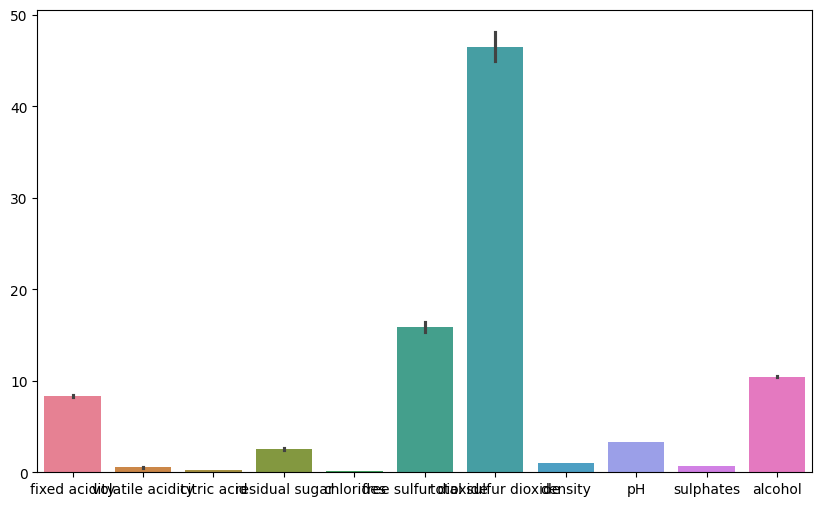

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(X)

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans

KMeans(n_clusters=1, n_init=10, random_state=0)

In [33]:
kmeans.fit(X_scaled)
kmeans.inertia_ # Within cluster sum of squares

17589.000000000004

In [34]:
# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [36]:
print("wcss",wcss)

wcss [17589.000000000004, 14330.142460204968, 12629.974591732647, 11294.336414734316, 10155.374026344627, 9432.703983271858, 8645.821246907975, 8299.93652114742, 7967.946902942687, 7695.801820763027]


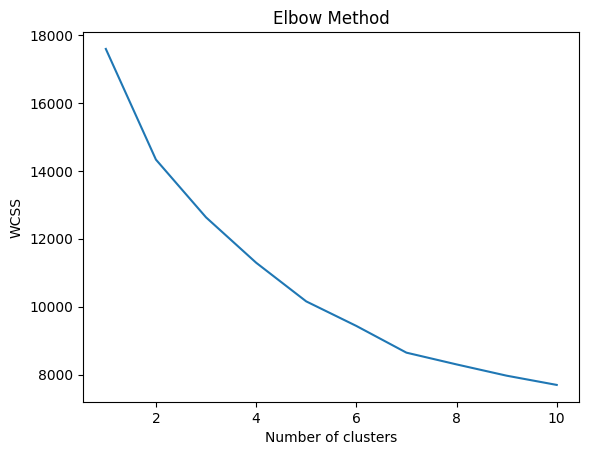

In [40]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

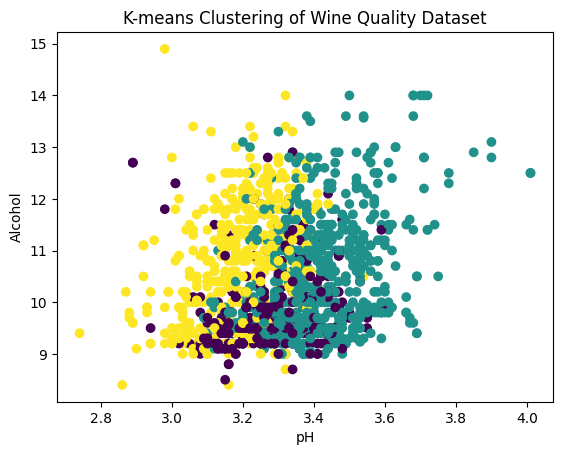

In [41]:
# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add cluster labels to the original dataset
df['cluster'] = labels

# Visualize the clusters
plt.scatter(df['pH'], df['alcohol'], c=labels, cmap='viridis')
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.title('K-means Clustering of Wine Quality Dataset')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Score: 0.0708403168283217
Davies-Bouldin Index: 4.049204917849315
Calinski-Harabasz Index: 870.3846985316482
